<a href="https://colab.research.google.com/github/kumarsinghashu/Airline-Passenger-Referral-Prediction/blob/main/Airline_Passenger_Referral_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b> <u>Project-Title : Airline Passenger Refferal Prediction</u></b>


#<b/>Project Type - Classification</b>


#<b/>Contribution - Individual</b>

### <b/>Name - Ashutosh Kumar Singh</b>

#<b/>Project Summary -</b>


Airlines often face the challenge of predicting whether passengers are likely to refer their services to others. This prediction can be valuable for various reasons, such as understanding customer satisfaction, identifying potential brand ambassadors, and optimizing marketing efforts.


The main objective of this project is to develop a predictive model that can classify airline passengers into two categories: those likely to refer the airline's services to others and those unlikely to do so.


###**Components of Project**

1)**Data Collection**: Gather historical data on airline passengers, including details of their travel experiences, demographics, and whether they have referred the airline to others in the past. This data can be collected through surveys, booking records, or customer feedback.

2) **Data Preprocessing**: Clean and preprocess the collected data. This involves handling missing values, encoding categorical variables, and scaling numerical features. Additionally, data exploration can be performed to gain insights into the dataset.

3) **Feature Selection/Engineering:** Identify and select relevant features that are likely to influence a passenger's referral behavior. Feature engineering may involve creating new variables or aggregating existing ones to extract valuable information.

4) **Model Building**: Build and train classification models using machine learning algorithms such as logistic regression, decision trees, random forests, or gradient boosting. Experiment with different algorithms to find the best-performing model.

5) **Model Evaluation**: Evaluate the model's performance using appropriate metrics such as accuracy, precision, recall, F1-score, and ROC AUC. Perform cross-validation to ensure the model's robustness.

6) **Hyperparameter Tuning**: Optimize model hyperparameters to improve predictive accuracy and generalization.

7) **Model Interpretation**: Interpret the model's results to understand which features contribute most to a passenger's likelihood of referral. This insight can help the airline make targeted improvements.

8) **Deployment**: Deploy the trained model in a production environment, such as a customer relationship management (CRM) system or marketing automation platform, to make real-time predictions on incoming passenger data.

**Monitoring and Maintenance:** Continuously monitor the model's performance and retrain it periodically to account for changing passenger behaviors and preferences.

Reporting and Visualization: Create reports and visualizations to communicate the model's findings and recommendations to airline stakeholders.

###**Benefits**

Identify passengers who are likely to refer the airline's services, enabling targeted marketing efforts towards this group.
Improve customer satisfaction by addressing the needs and concerns of passengers who are less likely to refer the airline.
Optimize marketing budgets by focusing resources on passengers with a higher likelihood of becoming brand ambassadors.
Gain insights into factors that influence passenger referral behavior, potentially leading to operational improvements.
Challenges:

The Airline Passenger Referral Prediction Classification project aims to leverage machine learning and predictive analytics to identify passengers who are likely to refer the airline's services. This can lead to more effective marketing strategies, improved customer satisfaction, and valuable insights for business decision-making.

#<b/>GitHub Link-

https://github.com/kumarsinghashu/Airline-Passenger-Referral-Prediction/blob/main/Airline_Passenger_Referral_Prediction.ipynb

#<b/>Problem Statement-</b>

##**Data includes airline reviews from 2006 to 2019 for popular airlines around the world with multiple choice and free text questions. Data is scraped in Spring 2019. The main objective is to predict whether passengers will refer the airline to their friends.**

###<b/>Feature Description</b>

* airline: Name of the airline.

* overall: Overall point is given to the trip between 1 to 10.

* author: Author of the trip

* reviewdate: Date of the Review

* customer review: Review of the customers in free text format

* aircraft: Type of the aircraft

* traveller type: Type of traveler (e.g. business, leisure)

* cabin: Cabin at the flight

* date flown: Flight date

* seat comfort: Rated between 1-5

* cabin service: Rated between 1-5

* food bev: Rated between 1-5

* entertainment: Rated between 1-5

* ground service: Rated between 1-5

* value for money: Rated between 1-5

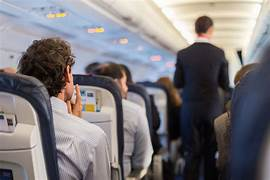

#<b/>Objective</b>

**In this project our aim is to forecast whether the passengers would recommend the airline to their friend and their favorite ones.**

#<b/>Let's Begin!</b>

#<b/>1.  Know Your Data</b>

# <b> <u>Importing Essential libraries</u></b>


In [ ]:
#Importing all the library

import numpy as np
import pandas as pd
from numpy import math

#Importing libraries for Data Visulization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
#Importing the models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb


# Importing  metrics for evaluation for our models
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

#<b/>Dataset Loading</b>

##<b> <u>Mount Drive, Giving.csv file location and Reading the .xlsx file</b></u>


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
airline_df = pd.read_excel('/content/drive/MyDrive/xlsx file/data_airline_reviews (1).xlsx')

#<b/>Exploring the data</b>

### <b/>First View of Dataset</b>

In [ ]:
# First look of Dataset.
airline_df.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Viewing the bottom rows of dataset.
airline_df.tail()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
131890,Ukraine International,NaN,Andriy Yesypenko,19th May 2006,Kiev - London (Gatwick) in business class (in ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131892,Ukraine International,NaN,Volodya Bilotkach,29th April 2006,Several flights - KBP to AMS (3 times one way)...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131894,Ukraine International,NaN,Kasper Hettinga,10th February 2006,KBP-AMS with UIA. Although it was a relatively...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no


###**The dataset contain 131895 rows and 17 columns.**

In [ ]:
# Shape of Dataset
airline_df.shape

(131895, 17)

In [ ]:
# Column name of dataset
airline_df.columns

Index(['airline', 'overall', 'author', 'review_date', 'customer_review',
       'aircraft', 'traveller_type', 'cabin', 'route', 'date_flown',
       'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'recommended'],
      dtype='object')

#<b/>Information About Data</b>

In [ ]:
# Dataset Information
airline_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131895 entries, 0 to 131894
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          65947 non-null  object 
 1   overall          64017 non-null  float64
 2   author           65947 non-null  object 
 3   review_date      65947 non-null  object 
 4   customer_review  65947 non-null  object 
 5   aircraft         19718 non-null  object 
 6   traveller_type   39755 non-null  object 
 7   cabin            63303 non-null  object 
 8   route            39726 non-null  object 
 9   date_flown       39633 non-null  object 
 10  seat_comfort     60681 non-null  float64
 11  cabin_service    60715 non-null  float64
 12  food_bev         52608 non-null  float64
 13  entertainment    44193 non-null  float64
 14  ground_service   39358 non-null  float64
 15  value_for_money  63975 non-null  float64
 16  recommended      64440 non-null  object 
dtypes: float64

In [ ]:
# Look at the unique values of the recommended column(target variable)
airline_df.recommended.unique()

array([nan, 'yes', 'no'], dtype=object)

In [ ]:
# Checking the unique value
airline_df.nunique()

airline               81
overall               10
author             44069
review_date         3015
customer_review    61172
aircraft            2088
traveller_type         4
cabin                  4
route              24549
date_flown            63
seat_comfort           5
cabin_service          5
food_bev               5
entertainment          5
ground_service         5
value_for_money        5
recommended            2
dtype: int64

###<b/>Duplicate Values</b>

In [ ]:
# Checking duplicate values
airline_df.duplicated().sum()

70711

In [ ]:
# droping the null values
airline_df.drop_duplicates(inplace = True)

In [ ]:
airline_df.duplicated().sum()

0

###<b/>Missing Values/Null Values</b>

In [ ]:
# Checking the null values for all the column.
airline_df.isnull().sum()

airline                1
overall             1783
author                 1
review_date            1
customer_review        1
aircraft           42696
traveller_type     23644
cabin               2479
route              23671
date_flown         23750
seat_comfort        4973
cabin_service       4944
food_bev           12843
entertainment      20954
ground_service     24015
value_for_money     1857
recommended         1423
dtype: int64

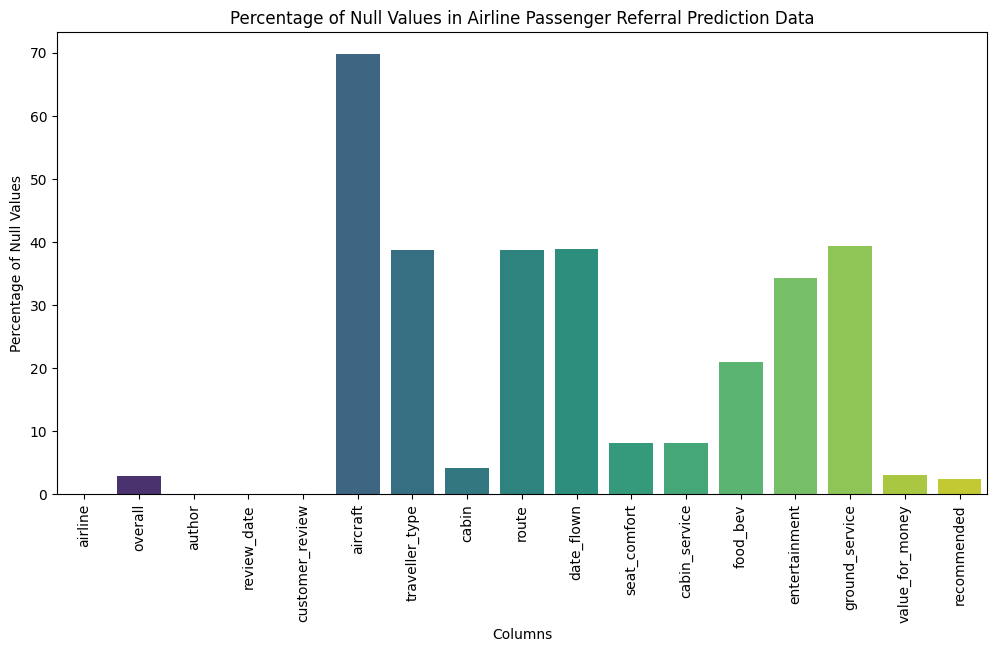

In [ ]:
null_percentage = (airline_df.isnull().sum() / len(airline_df)) * 100

plt.figure(figsize=(12, 6))
sns.barplot(x=null_percentage.index, y=null_percentage.values, palette="viridis")
plt.xticks(rotation=90)
plt.xlabel("Columns")
plt.ylabel("Percentage of Null Values")
plt.title("Percentage of Null Values in Airline Passenger Referral Prediction Data")
plt.show()


###<b/>Understanding the variable</b>

In [ ]:
# Description of data
airline_df.describe().T

,count,mean,std,min,25%,50%,75%,max
overall,59401.0,5.164863,3.483701,1.0,1.0,5.0,9.0,10.0
seat_comfort,56211.0,2.959278,1.436467,1.0,2.0,3.0,4.0,5.0
cabin_service,56240.0,3.200231,1.568429,1.0,2.0,3.0,5.0,5.0
food_bev,48341.0,2.926956,1.483122,1.0,1.0,3.0,4.0,5.0
entertainment,40230.0,2.887994,1.504452,1.0,1.0,3.0,4.0,5.0
ground_service,37169.0,2.681347,1.613995,1.0,1.0,3.0,4.0,5.0
value_for_money,59327.0,2.950849,1.588433,1.0,1.0,3.0,4.0,5.0


#<b/>EDA(Exploratory Data Analysis)</b>

##<b/>Questions-
Q1) Which Traveller type has more ratings?

Q2) What are the average ratings given by passengers for food and beverage as well as entertainment in Economy Class?

Q3)What are the  number of Aircraft at each type?

Q4) Which airline makes highest number of trip ?


Q5) Which cabin class passenger are choose to fly?


Q6) How do all of the independent variables/features compare with each other?</b>


###<b/>Q1) Which Traveller type has more ratings?</b>

<Axes: >

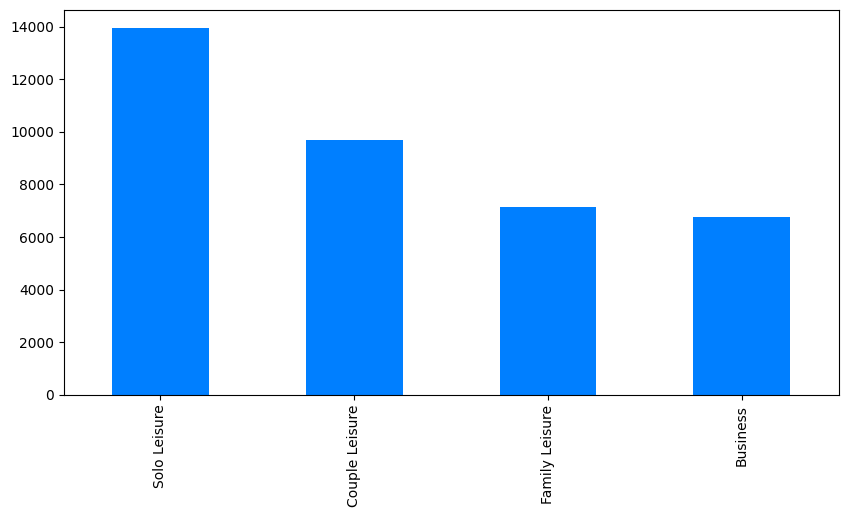

In [ ]:
#using bar plot to get traveller type class with their count
sns.set_palette('gist_ncar')
plt.figure(figsize=(10,5))
airline_df['traveller_type'].value_counts().plot(kind='bar',figsize=(10,5))

**In Traveller Type Solo Leisure get highest ratings.**

###**Q2) What are the average ratings given by passengers for food and beverage as well as entertainment in Economy Class?**  

In [ ]:
#Here we doing groupby method
a=airline_df.groupby('cabin')[['food_bev', 'entertainment']].mean().reset_index()
a


,cabin,food_bev,entertainment
0,Business Class,3.525108,3.356407
1,Economy Class,2.776919,2.758083
2,First Class,3.384295,3.280827
3,Premium Economy,2.919603,3.038980


<Axes: xlabel='cabin'>

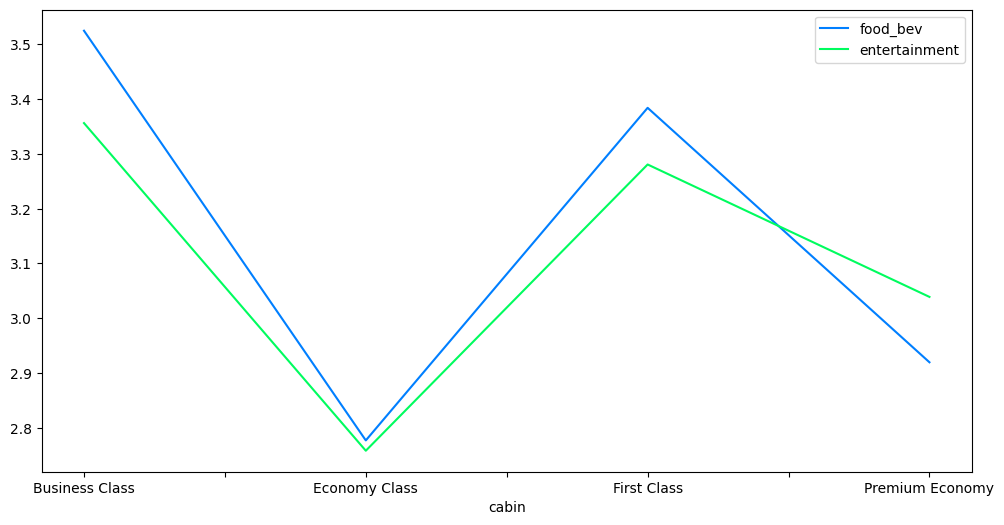

In [ ]:
plt.rcParams['figure.figsize']=(12,6)
a.plot(x="cabin", y=["food_bev", "entertainment"], kind="line")


**Based on the plot, it can be conclude that the ratings given by passenger for food_bev and entertainment in Economy class is lower than other class cabin.**

###**Q3) What are the number of Aircraft at each type?**

In [ ]:
# Get the number of aircrafts of each type
top_n_aircraft_type = airline_df['aircraft'].value_counts()
top_n_aircraft_type

A320                         2130
A380                         1109
Boeing 777                   1101
Boeing 737-800               1021
A330                          974
                             ... 
Boeing 777-200 / 757-300        1
CRJ-700 (and others)            1
Crj200                          1
Embraer, Boeing 777 / 787       1
boeing 767                      1
Name: aircraft, Length: 2088, dtype: int64

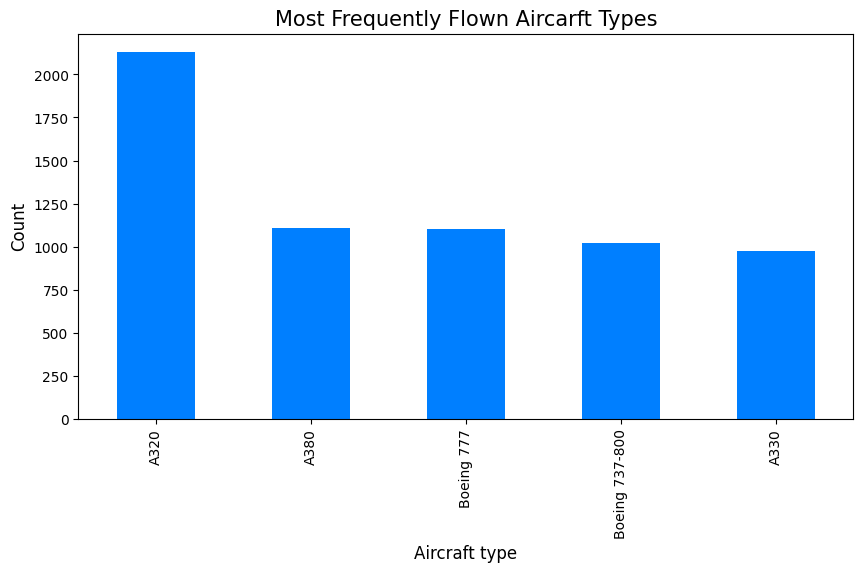

In [ ]:
# Visualize the top 5 most frequently flown aircarft types
plt.figure(figsize=(10,5))
top_n_aircraft_type[:5].plot(kind='bar')
plt.xlabel('Aircraft type',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('Most Frequently Flown Aircarft Types',fontsize=15)
plt.show()

**Here, we inspected that their are top 5 types of aircrafts, who has tripped the most. And the aircrafts are-**

1) A320

2)  A380

3) Boeing 777

4) Boeing 737-800

5) A330

**Amid, all aircraft A320 has done highest number of trip because most of the airline prefer this type of aircraft due to it's  medium passenger capacity and low operational cost.**

###**Q4) Which airline makes highest number of trip ?**

In [ ]:
#Get the number of trip done by each airline
top_n_airline = airline_df['airline'].value_counts()
top_n_airline

Spirit Airlines       2871
American Airlines     2846
United Airlines       2774
British Airways       2731
Emirates              1763
                      ... 
QantasLink             104
Adria Airways           85
Air Arabia              80
Tunisair                71
Thai Smile Airways      48
Name: airline, Length: 81, dtype: int64

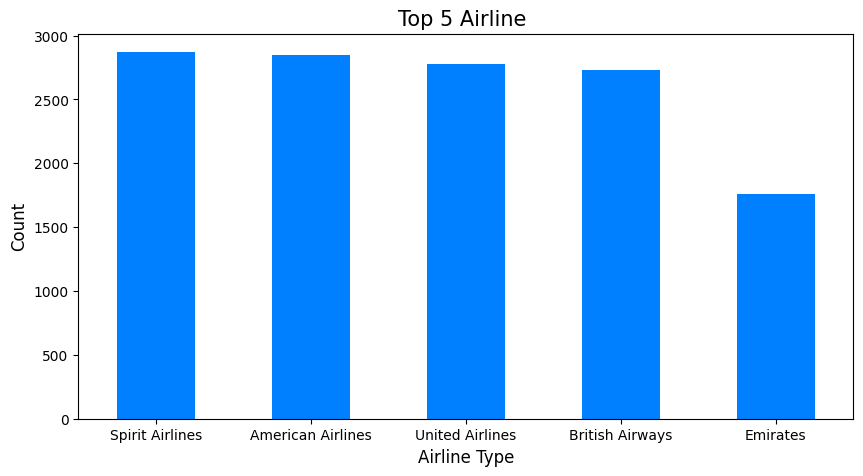

In [ ]:
# Visualize the top 5 airlines with most trips
plt.figure(figsize=(10,5))
top_n_airline[:5].plot(kind='bar')
plt.xlabel('Airline Type',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('Top 5 Airline ',fontsize=15)
plt.xticks(rotation='horizontal')
plt.show()

**Here, we inspected that their are top 5 airlines, who has tripped the most. And the airlines are-**

1) Spirit Airlines

2) American Airlines

3) United Airlines

4) British Airways

5) Emirates


**Spirit Airlines has maximum number of trips because the Spirit Airlines has low fair as compared to others.**

###**Q5) Which cabin class passenger are choose to fly?**

<Axes: ylabel='cabin'>

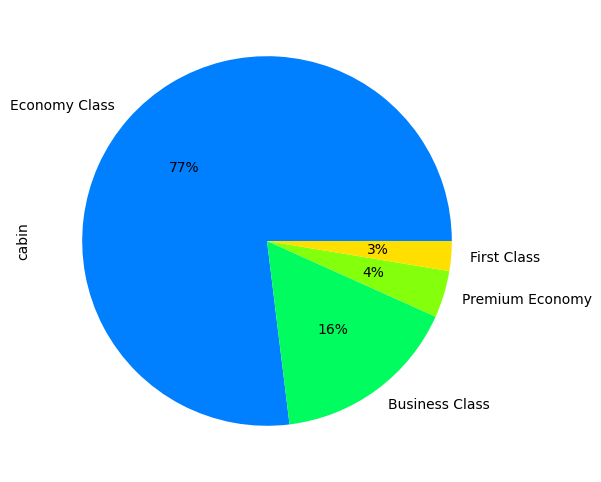

In [ ]:
 # Get the number of passengers for each cabin class through pie chart visualization
airline_df['cabin'].value_counts().plot(kind='pie',autopct='%1.0f%%',figsize=(14,6))


**From the above graph, here we visulize that 77% of passenger  choose economy class and 3% of passenger choose the first class because economy class has lesser fair as compared to first class.**

###**Q6) How do all of the independent variables/features compare with each other?**

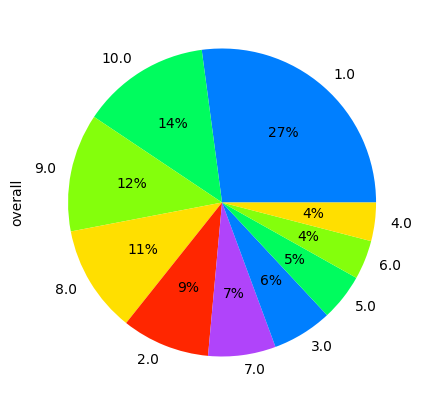

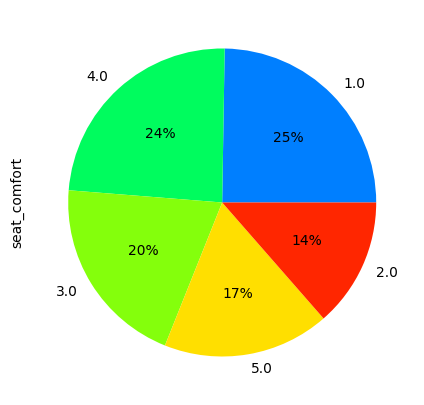

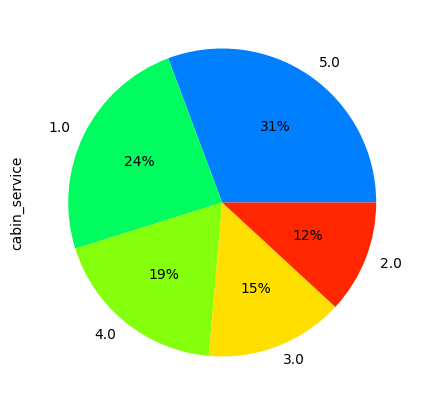

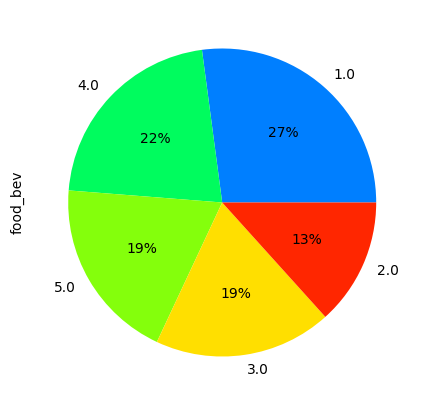

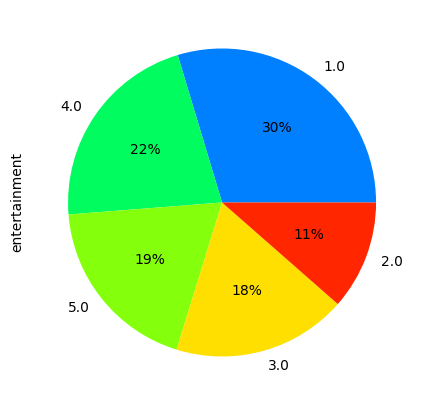

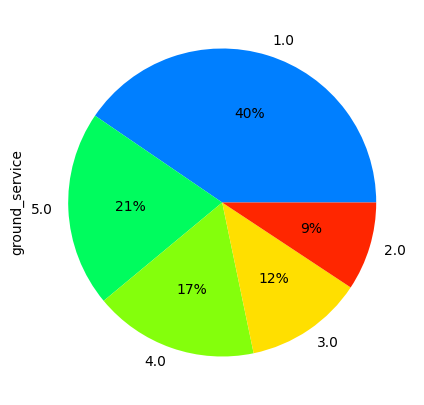

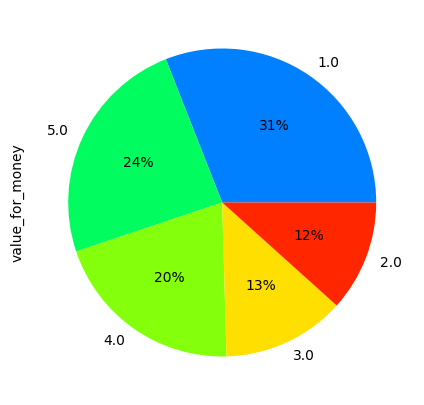

In [ ]:
# Get the percentage distribution of passengers with different ratings for numerical features
for col in ['overall','seat_comfort','cabin_service','food_bev','entertainment','ground_service','value_for_money']:
  fig = plt.figure(figsize=(10, 5))
  ax = fig.gca()
  airline_df[col].value_counts().plot(kind='pie',autopct='%1.0f%%')


**From the above pie plot, we visualized that-**

- 44% of passengers gave the 7 ratings out of 10 for the services that offered by airlines.


- 25% of passengers are not much happy with seat comfort and 31% of passengers are well satisfied with cabin services.

- 41% of passengers are satisfied with food and beverages and 30% of passengers were not liked and in disfavour the entertaintment service provided.

- 40% of passengers dislikes the ground service and 44 %  passengers are considers the trip to be value for money.






#<b/>Feature descriptions briefly as follows:</b>
- **airline**: Name of the airline in str fromat

- **overall**: Overall point is given to the trip between 1 to 10 in float format.

- **author**: Author of the trip in str format

- **reviewdate**: Date of the Review customer review: Review of the customers in free text format in str need to be converted into DateTime Format

- **aircraft**: Type of the aircraft in str format

- **travellertype**: Type of traveler (e.g. business, leisure) consist of four class in str format

- **cabin**: Cabin at the flight date flown: Flight date in str format consist of 4 class.

- **seatcomfort**: Rated between 1-5 in float format

- **cabin service**: Rated between 1-5 float format

- **foodbev**: Rated between 1-5 entertainment: Rated between 1-5 in float format

- **groundservice**: Rated between 1-5 in float form

- **valueformoney**: Rated between 1-5 in float format

#<b/>Feature Engineering</b>

In [ ]:
# Sorting the missing value Percentage wise
def missing_values(df):
# Calculate the percentage of missing values for each column
  missing_percentage = (airline_df.isnull().sum() / len(df)) * 100
# Create a DataFrame to store the missing value percentages
  missing_values_df = pd.DataFrame({'Column_name' : airline_df.columns,
                                    'missing_percentage' : missing_percentage})
# Sort the DataFrame by missing percentage in descending order
  return missing_values_df.sort_values('missing_percentage', ascending = False)

In [ ]:
# Checking the missing values percentage wise
missing_values(airline_df)

,Column_name,missing_percentage
aircraft,aircraft,69.782950
ground_service,ground_service,39.250458
date_flown,date_flown,38.817338
route,route,38.688219
traveller_type,traveller_type,38.644090
entertainment,entertainment,34.247516
food_bev,food_bev,20.990782
seat_comfort,seat_comfort,8.127942
cabin_service,cabin_service,8.080544
cabin,cabin,4.051713


In [ ]:
# Displaying the unique aircraft names
airline_df.aircraft.unique()

array([nan, 'A330', 'Boeing 737-800 / A330-300', ...,
       'Boeing 737-800 and Embraer 190', 'Boeing 737-400/ 737-800',
       'boeing 767'], dtype=object)

In [ ]:
# No. of unique aircraft
airline_df.aircraft.nunique()


2088

<b/>Droping the aircraft column from dataset because it contains a huge number of missing values.

In [ ]:
# Droping the aircraft column
airline_df = airline_df.drop(['aircraft'], axis = 1)

In [ ]:
# Droping unnecessary column from data
airline_df = airline_df.drop(['author', 'review_date', 'route', 'date_flown', 'customer_review'], axis = 1)

In [ ]:
airline_df.head()

,airline,overall,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Business,Economy Class,4.0,5.0,4.0,4.0,2.0,4.0,yes
3,Turkish Airlines,2.0,Family Leisure,Economy Class,4.0,1.0,1.0,1.0,1.0,1.0,no
5,Turkish Airlines,3.0,Business,Economy Class,1.0,4.0,1.0,3.0,1.0,2.0,no
7,Turkish Airlines,10.0,Solo Leisure,Economy Class,4.0,5.0,5.0,5.0,5.0,5.0,yes


###<b/>The Reason behind removing this column was -</b>

- author : In this categorical column have high variability and this is not required in prediction purpose.

- review_date : It is similar to date_flown, it's not required.

- date_flown : It's not a time series data, and there have some common time periods between two dates, that's why not needed for modeling.

- route : It is independent of the services and quality of travels, so this is not needed for modeling.

-  customer_review : This column belongs to general feature review and it is unessential.



###<b/>Based on null value percentage we divided our data in two parts -</b>

- low_null  : A column that contain low percentage of null values.

- high_null : A column that contain high percentage of values.

In [ ]:
# Seperating the Numerical column
low_null_values = ['overall', 'seat_comfort',	'cabin_service', 'value_for_money']
high_null_values = ['food_bev',	'entertainment',	'ground_service']

In [ ]:
#  Quantile-1 using as imputational technique
def quantile1(df,column):
  Q1 = np.percentile(np.sort(df[column].dropna()),25)
  df[column].fillna(Q1, inplace = True)

In [ ]:
# Looping the null value
for col in low_null_values:
  quantile1(airline_df,col)


- Here, we implemented null values to Quantile-1, for low null value percentage in columns.

In [ ]:
# Median using as imputation technique
def median(df,column):
  df[column].fillna(df[column].median(), inplace=True)



In [ ]:
for col in high_null_values:
  median(airline_df,col)


- Here, we implemented null values to median, for high null value percentage in columns.

In [ ]:
airline_df.head(1)

,airline,overall,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,1.0,NaN,NaN,2.0,2.0,3.0,3.0,3.0,1.0,NaN


- <b/>traveller type, cabin, recommended have null values that we left.</b>

In [ ]:
# Droping the recommended null value column
airline_df.dropna(subset=['recommended'], inplace=True)

In [ ]:
airline_df['traveller_type'].fillna(method="ffill",inplace=True)

In [ ]:
airline_df['cabin'].fillna(airline_df['cabin'].mode().values[0],inplace=True)

- filling traveller type column with forward fill method

- filling cabin with mode method


In [ ]:
airline_df.head(1)

,airline,overall,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
1,Turkish Airlines,7.0,Business,Economy Class,4.0,5.0,4.0,4.0,2.0,4.0,yes


In [ ]:
# Checking the null percentage
missing_values(airline_df)

,Column_name,missing_percentage
airline,airline,0.0
overall,overall,0.0
traveller_type,traveller_type,0.0
cabin,cabin,0.0
seat_comfort,seat_comfort,0.0
cabin_service,cabin_service,0.0
food_bev,food_bev,0.0
entertainment,entertainment,0.0
ground_service,ground_service,0.0
value_for_money,value_for_money,0.0


In [ ]:
airline_df.shape

(59761, 11)

**Now our dataset is clean, dataset cleaning is ensuring the step that the data is accurate, consistent, and free of errors, when your data is incorrect or inconsistent data can negatively impact the performance of the ML model.**

**Cleaning data is crucial step, when your data is cleaned the model performances is enhanced.**

#<b/>Label Encoding

Converting the target variable as categorical to numerical.

In [ ]:
#Converting the target column
airline_df['recommended'].replace({'yes':1, 'no':0},inplace=True)

In [ ]:
airline_df.head(3)

,airline,overall,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
1,Turkish Airlines,7.0,Business,Economy Class,4.0,5.0,4.0,4.0,2.0,4.0,1
3,Turkish Airlines,2.0,Family Leisure,Economy Class,4.0,1.0,1.0,1.0,1.0,1.0,0
5,Turkish Airlines,3.0,Business,Economy Class,1.0,4.0,1.0,3.0,1.0,2.0,0


#<b/>Coorelation Plot</b>

<Axes: >

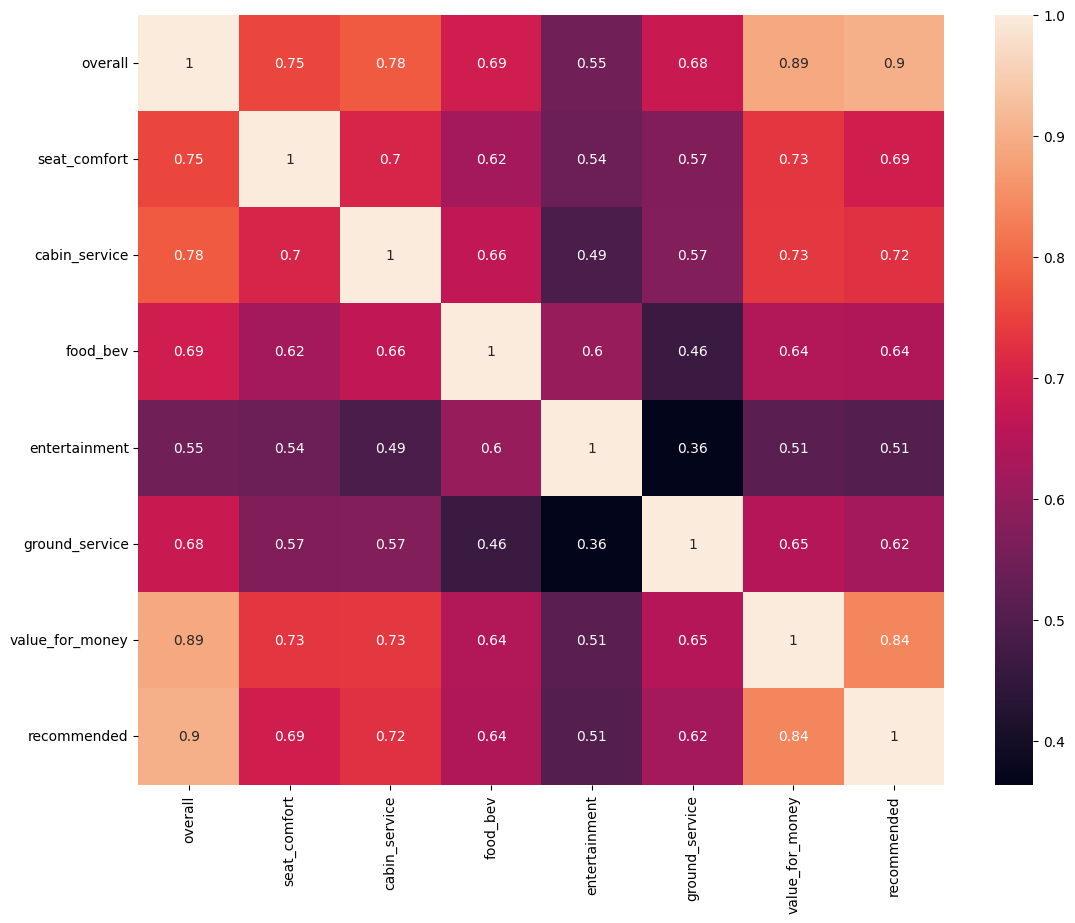

In [ ]:
plt.figure(figsize=(13,10))
sns.heatmap(airline_df.corr(), annot=True)

**Remove the "Overall" column from the dataset because it demonstrate the higest coorelation with other features, which causes to multicollinearity during prediction.**

In [ ]:
# Generating a function to remove multicollinearity
def cal_vif(X):
  vif = pd.DataFrame()
  vif["variables"] = X.columns
  vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

  return(vif)

In [ ]:
cal_vif(airline_df[[i for i in airline_df.describe().columns if i not in ['recommended', 'value_for_money', 'overall']]])

,variables,VIF
0,seat_comfort,12.743652
1,cabin_service,12.939449
2,food_bev,13.023156
3,entertainment,9.669901
4,ground_service,8.380607


In [ ]:
# droping "overall" column
airline_df.drop(["overall"], axis=1, inplace=True)

In [ ]:
# droping "airline" column
airline_df.drop(["airline"], axis=1, inplace=True)

* **Here we removed "overall" and "airline" column from our dataset because it not needed for further analysis or modeling.**

###<b/>Describing dependent and independent variables.</b>

In [ ]:
# Splitting the dependent and independent variables
y = airline_df['recommended']
x = airline_df.drop(columns = 'recommended')

In [ ]:
x.columns

Index(['traveller_type', 'cabin', 'seat_comfort', 'cabin_service', 'food_bev',
       'entertainment', 'ground_service', 'value_for_money'],
      dtype='object')

#<b/>One Hot Encoding</b>

In [ ]:
x = pd.get_dummies(x)

In [ ]:
x.shape

(59761, 14)

In [ ]:
x.head(3)

,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,traveller_type_Business,traveller_type_Couple Leisure,traveller_type_Family Leisure,traveller_type_Solo Leisure,cabin_Business Class,cabin_Economy Class,cabin_First Class,cabin_Premium Economy
1,4.0,5.0,4.0,4.0,2.0,4.0,1,0,0,0,0,1,0,0
3,4.0,1.0,1.0,1.0,1.0,1.0,0,0,1,0,0,1,0,0
5,1.0,4.0,1.0,3.0,1.0,2.0,1,0,0,0,0,1,0,0


In [ ]:
print("The percentage of No lables of Target Variable is", np.round(y.value_counts()[0]/len(y)*100))
print("The percentage of Yes labels of Target Variable is", np.round(y.value_counts()[1]/len(y)*100))

The percentage of No lables of Target Variable is 52.0
The percentage of Yes labels of Target Variable is 48.0


- **The percentage of both label ('yes' and 'no') is almost same, here is not need  to use any class imbalance handling.**

#<b/>Splitting Data into Train and Test</b>

In [ ]:
# train and test split
x_train, x_test, y_train, y_test = train_test_split( x,y ,  test_size = 0.2, random_state = 42)

In [ ]:
# shape of x_train and x_test data
print(x_train.shape)
print(x_test.shape)

(47808, 14)
(11953, 14)


In [ ]:
print(y_train.shape)
print(y_test.shape)

(47808,)
(11953,)


#<b/>ML- Model Implementation</b>

# <b/>1) Logistic Regression</b>

In [ ]:
# Fitting the logistic regression
lr = LogisticRegression(fit_intercept=True, max_iter=10000)
lr.fit(x_train, y_train)

LogisticRegression(max_iter=10000)

In [ ]:
# Model coefficients
lr.coef_

array([[ 0.29470524,  0.54964494,  0.43522642,  0.24880929,  0.72092498,
         1.63381309,  0.15000711, -0.04985052, -0.15934752,  0.06655806,
         0.14922398, -0.06516326,  0.11367346, -0.19036704]])

In [ ]:
# Intercept value
lr.intercept_

array([-11.84300155])

In [ ]:
# Train and Test score
print(f'Train score= {round(lr.score(x_train,y_train), 4)}')
print(f'Test score= {round(lr.score(x_test,y_test), 4)}')

Train score= 0.939
Test score= 0.9324


In [ ]:
#  test data
np.array (y_test )

array([0, 0, 1, ..., 1, 1, 1])

In [ ]:
# predicted test data
y_pred = lr.predict(x_test)

y_pred

array([0, 0, 1, ..., 1, 1, 1])

In [ ]:
#evaluation matrix or report of logistic regression
print(metrics.classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.94      0.93      0.93      6225
           1       0.92      0.94      0.93      5728

    accuracy                           0.93     11953
   macro avg       0.93      0.93      0.93     11953
weighted avg       0.93      0.93      0.93     11953



- **93% accuracy in logistic regression.**

###<b/>ROC Curve of Logistic Regression</b>

In [ ]:
# roc_auc_score
y_pred_proba =lr.predict_proba(x_test)[::,1]
auc_score=roc_auc_score(y_test, y_pred_proba)
auc_score

0.9796338706782437

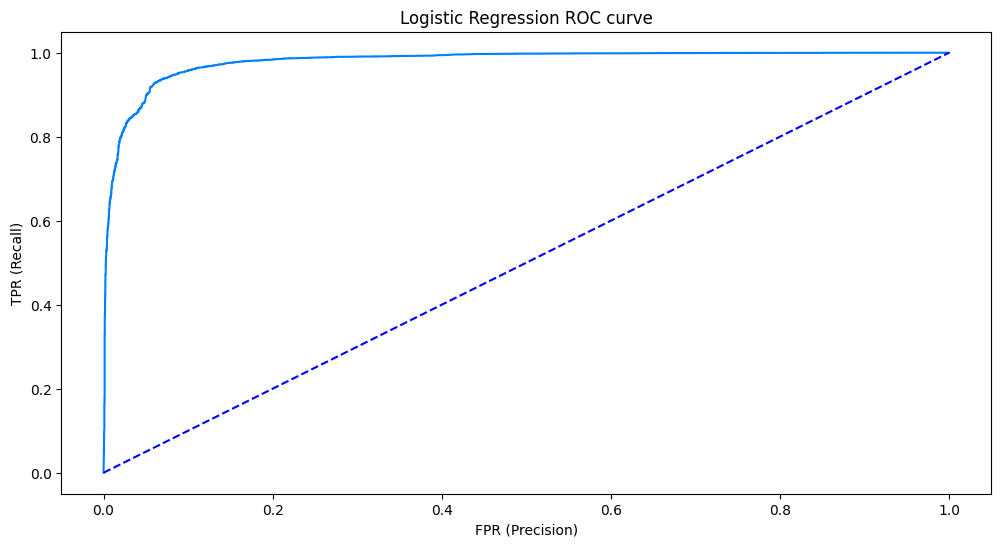

In [ ]:
#plot of roc_curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

#title of plot
plt.title('Logistic Regression ROC curve')

#label
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='blue')
plt.show()


###<b/>Evaluation Metrics of Logistic Regression</b>

In [ ]:
#column
column = ['Model','Accuracy','Recall','Precision','f1-score','roc_auc_score']

#new dataframe for evaluation metric
evaluation_metrics_df= pd.DataFrame(columns = column)


In [ ]:
#creating function for storing evaluation metrices
def evaluation_metric(model,y_test,y_pred,metric_df):
  '''
   Function for evaluation metric
  '''
  metric_df= metric_df.append({'Model': model,
                               'Train score':lr.score(x_train,y_train),
                               'Test score':lr.score(x_test,y_test),
                               'Accuracy':accuracy_score(y_test,y_pred),
                               'Recall':recall_score(y_test,y_pred),
                               'Precision':precision_score(y_test,y_pred),
                               'f1-score':f1_score(y_test,y_pred),
                               'roc_auc_score':roc_auc_score(y_test,y_pred_proba)
                               },ignore_index=True)
  return metric_df

In [ ]:
#appending values in dataframe
evaluation_metrics_df=evaluation_metric('Logistic Regression', y_test, y_pred, evaluation_metrics_df)
evaluation_metrics_df

,Model,Accuracy,Recall,Precision,f1-score,roc_auc_score,Train score,Test score
0,Logistic Regression,0.932402,0.939595,0.920945,0.930176,0.979634,0.938985,0.932402


[[5763  462]
 [ 346 5382]]


[Text(0, 0.5, 'No'), Text(0, 1.5, 'Yes')]

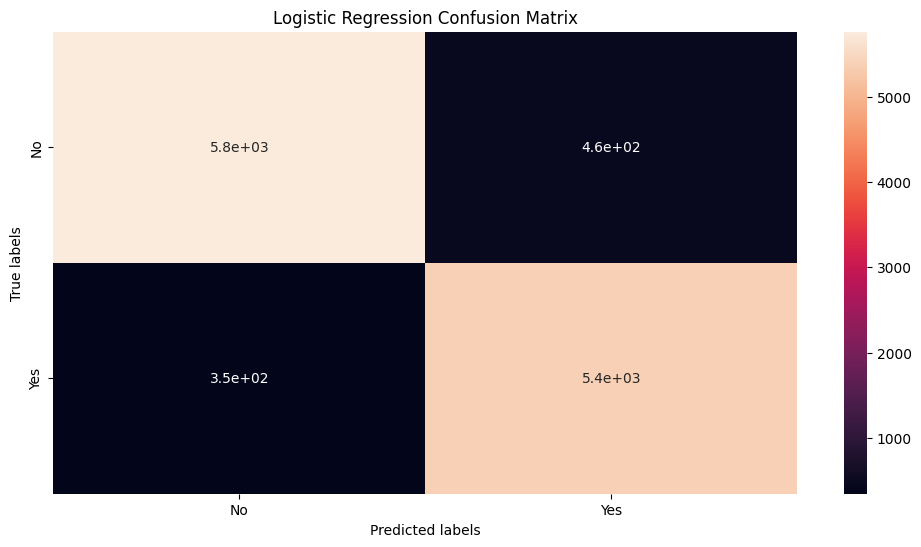

In [ ]:
# Get the confusion matrix for both train and test

labels = ['No', 'Yes']
cm = confusion_matrix(y_test, y_pred)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')

#title of plot
ax.set_title('Logistic Regression Confusion Matrix')

#labelling
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

# <b/>2) Random Forest </b>

In [ ]:
#fitting the random forest in training set
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
#predicted test data
y_pred = rf.predict(x_test)
y_pred

array([0, 0, 1, ..., 1, 1, 1])

In [ ]:
#evaluation metrics or the report of random forest
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      6225
           1       0.93      0.93      0.93      5728

    accuracy                           0.93     11953
   macro avg       0.93      0.93      0.93     11953
weighted avg       0.93      0.93      0.93     11953



###<b/>ROC Curve of Random Forest</b>

In [ ]:
#roc_auc_score
y_pred_proba =rf.predict_proba(x_test)[::,1]
auc_score=roc_auc_score(y_test,y_pred_proba)
auc_score

0.9760673840613853

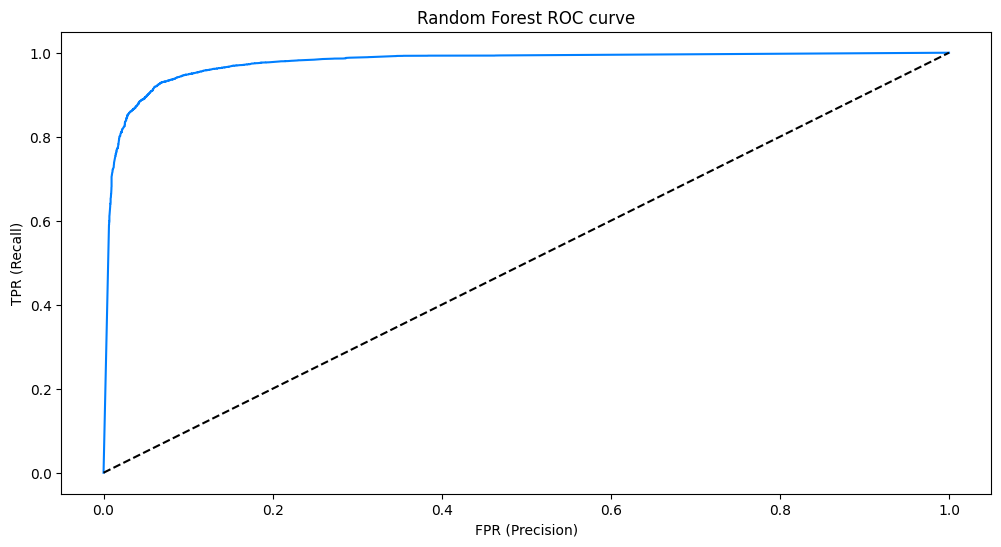

In [ ]:
#plotting roc_auc_curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

#title of plot
plt.title('Random Forest ROC curve')

#labelling
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

###<b/>Evaluation Metrics of Random Forest</b>


In [ ]:
#appending values in evaluation metrics dataframe
evaluation_metrics_df=evaluation_metric('Random Forest Classifier', y_test, y_pred, evaluation_metrics_df)
evaluation_metrics_df

,Model,Accuracy,Recall,Precision,f1-score,roc_auc_score,Train score,Test score
0,Logistic Regression,0.932402,0.939595,0.920945,0.930176,0.979634,0.938985,0.932402
1,Random Forest Classifier,0.930394,0.927374,0.927374,0.927374,0.976067,0.938985,0.932402


###<b/>Confusion Metrics for Random Forest</b>


[[5809  416]
 [ 416 5312]]


Text(0.5, 1.0, 'Random Forest Confusion Matrix')

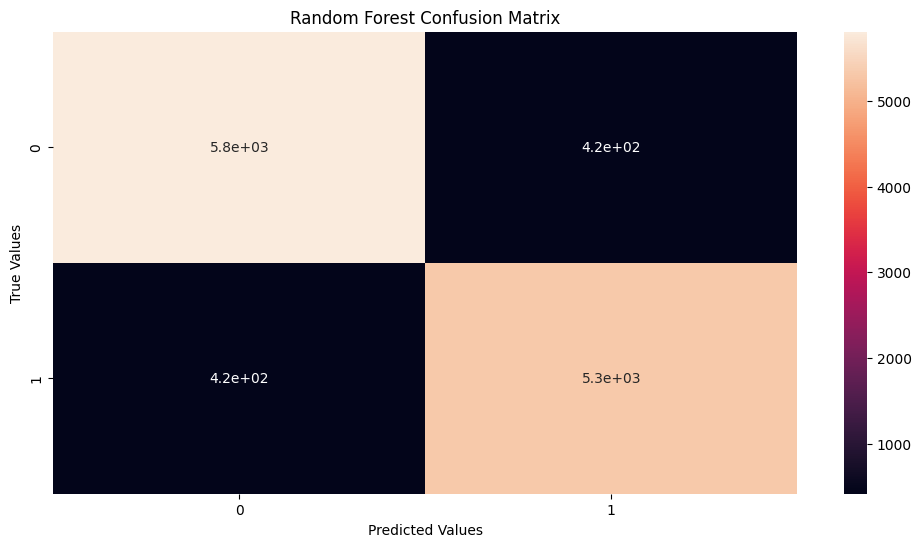

In [ ]:
# Get the confusion matrix for both train and test
cm = confusion_matrix(y_test, y_pred)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted Values')
ax.set_ylabel('True Values')

#title of plot
ax.set_title('Random Forest Confusion Matrix')


###<b/>Hyperparameter Tuning of Random Forest</b>


In [ ]:
#Hyperparametric Tuning to get best parameter for evaluation
param_dict = {'n_estimators' : [50,80,100],
              'max_depth' : [6,8,10,12],
              'min_samples_split' : [10,50,100],
              'min_samples_leaf' : [30,40,50]}

In [ ]:
#assigning grid search variable
rf_grid = GridSearchCV(estimator=rf,
                       param_grid = param_dict,
                       cv = 5, verbose=2)

#Evaluating the optimal parameters
rf_grid.fit(x_train,y_train)
rf_grid.best_estimator_

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50; total time=   1.1s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50; total time=   1.1s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50; total time=   1.1s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50; total time=   1.1s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50; total time=   0.7s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=80; total time=   1.1s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=80; total time=   1.0s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=80; total time=   1.0s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=80; total time=   1.3s
[CV] END max_depth=6, min_sa

RandomForestClassifier(max_depth=10, min_samples_leaf=30, min_samples_split=10)

In [ ]:
#getting best parameter from grid search
rf_grid.best_params_

{'max_depth': 10,
 'min_samples_leaf': 30,
 'min_samples_split': 10,
 'n_estimators': 100}

In [ ]:
#assigning best param variable
rf_grid_best = rf_grid.best_estimator_
rf_grid_best

RandomForestClassifier(max_depth=10, min_samples_leaf=30, min_samples_split=10)

In [ ]:
#predicting values
y_pred=rf_grid_best.predict(x_test)

In [ ]:
#evaluation metrics
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      6225
           1       0.93      0.93      0.93      5728

    accuracy                           0.93     11953
   macro avg       0.93      0.93      0.93     11953
weighted avg       0.93      0.93      0.93     11953



In [ ]:
#roc_auc_score
y_pred_proba =rf_grid_best.predict_proba(x_test)[::,1]

auc_score=roc_auc_score(y_test,y_pred_proba)
auc_score

0.9820788180655583

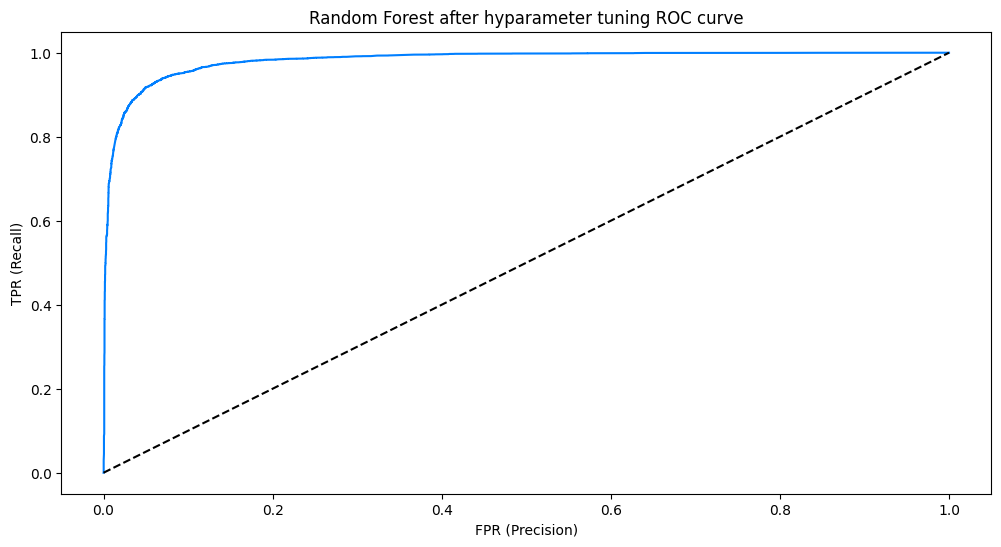

In [ ]:
#plot of roc_curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

#title of plot
plt.title('Random Forest after hyparameter tuning ROC curve')

#label
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

#plot
plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

###<b/>Evaluation Metrics after Hyperparameter Tuning of Random Forest</b>


In [ ]:
## Evaluation Metrics of Random Forest
evaluation_metrics_df=evaluation_metric('Random Forest with GridSearchCV', y_test, y_pred, evaluation_metrics_df)
evaluation_metrics_df

,Model,Accuracy,Recall,Precision,f1-score,roc_auc_score,Train score,Test score
0,Logistic Regression,0.932402,0.939595,0.920945,0.930176,0.979634,0.938985,0.932402
1,Random Forest Classifier,0.930394,0.927374,0.927374,0.927374,0.976067,0.938985,0.932402
2,Random Forest with GridSearchCV,0.934493,0.929993,0.933088,0.931538,0.982079,0.938985,0.932402


###<b/>Confusion matrix after Hyperparameter Tuning of Random Forest</b>

[[5843  382]
 [ 401 5327]]


Text(0.5, 1.0, 'Random Forest with hyperparameter tuning Confusion Matrix')

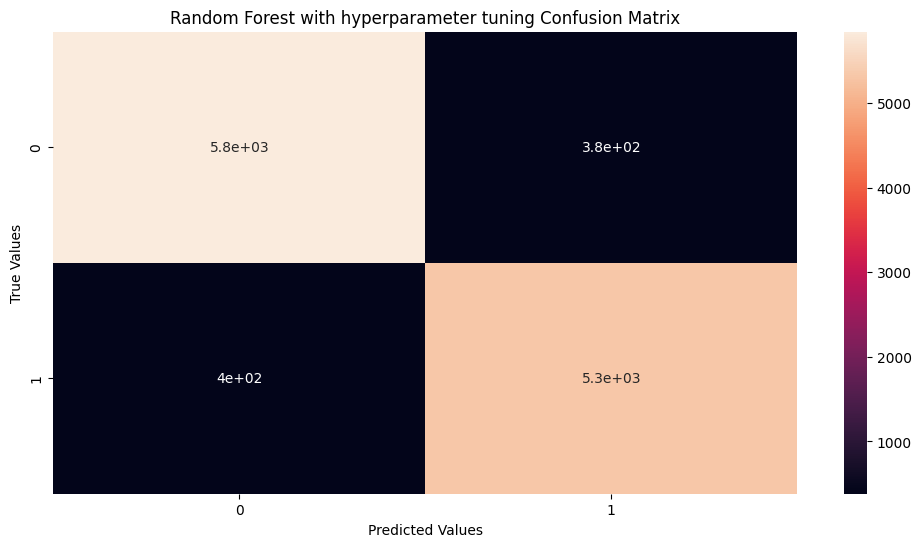

In [ ]:
# Get the confusion matrix for both train and test
cm = confusion_matrix(y_test, y_pred)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted Values')
ax.set_ylabel('True Values')
ax.set_title('Random Forest with hyperparameter tuning Confusion Matrix')

# <b/>3) XG Boost Classifier</b>

In [ ]:
#fitting Xgboost in training set
xgboost=xgb.XGBClassifier()
xgboost.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
#predicted test data.
y_pred = xgboost.predict(x_test)
y_pred

array([0, 0, 1, ..., 1, 1, 1])

In [ ]:
#evaluation metrics
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93      6225
           1       0.93      0.93      0.93      5728

    accuracy                           0.93     11953
   macro avg       0.93      0.93      0.93     11953
weighted avg       0.93      0.93      0.93     11953



###<b/>Roc Curve of XG Boost</b>

In [ ]:
#roc_auc_score
y_pred_proba =xgboost.predict_proba(x_test)[::,1]
auc_score=roc_auc_score(y_test,y_pred_proba)
auc_score

0.9812016081084114

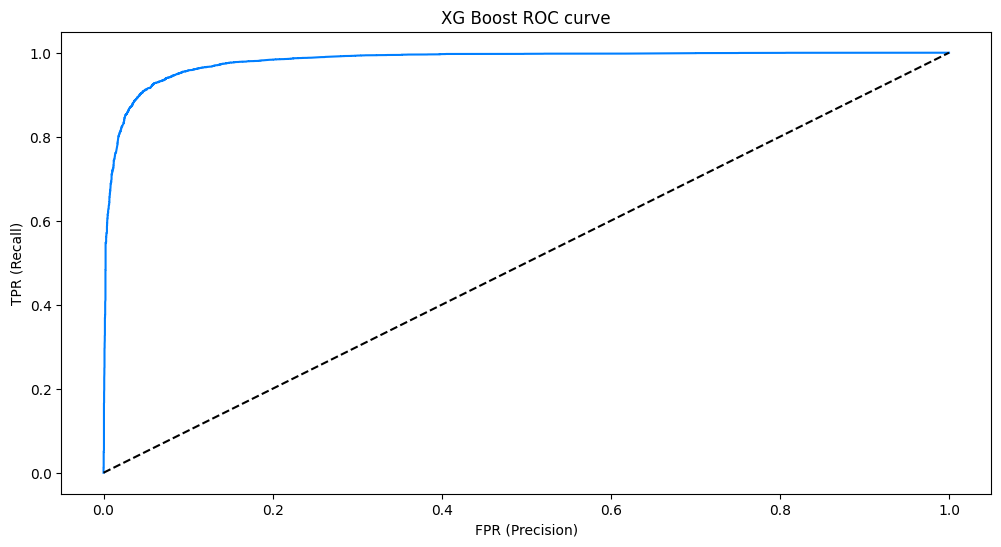

In [ ]:
#plot of roc_curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

#title of plot
plt.title('XG Boost ROC curve')

#label
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

#plot
plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

###<b/>Evaluation Metrics of XG Boost</b>

In [ ]:
#appending values in datafame of evaluation metrics
evaluation_metrics_df=evaluation_metric('XG Boost Classifier', y_test, y_pred, evaluation_metrics_df)
evaluation_metrics_df

,Model,Accuracy,Recall,Precision,f1-score,roc_auc_score,Train score,Test score
0,Logistic Regression,0.932402,0.939595,0.920945,0.930176,0.979634,0.938985,0.932402
1,Random Forest Classifier,0.930394,0.927374,0.927374,0.927374,0.976067,0.938985,0.932402
2,Random Forest with GridSearchCV,0.934493,0.929993,0.933088,0.931538,0.982079,0.938985,0.932402
3,XG Boost Classifier,0.932402,0.932437,0.926935,0.929678,0.981202,0.938985,0.932402


###<b/>Confusion matrix of XG Boost</b>

[[5804  421]
 [ 387 5341]]


Text(0.5, 1.0, 'XG Boost Classifier')

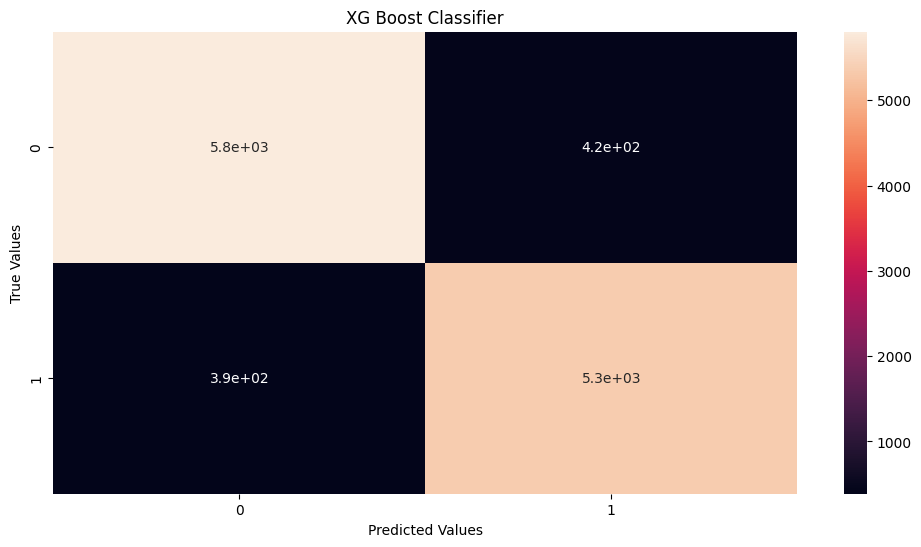

In [ ]:
# Get the confusion matrix for both train and test
cm = confusion_matrix(y_test, y_pred)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted Values')
ax.set_ylabel('True Values')
ax.set_title('XG Boost Classifier')

#<b/>4) K Nearest Neighbour Classifier</b>

In [ ]:
#fitting KNN in training set
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
#predicted test data.
y_pred = knn.predict(x_test)
y_pred

array([0, 0, 1, ..., 1, 1, 1])

In [ ]:
#evalution metrics
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      6225
           1       0.93      0.92      0.93      5728

    accuracy                           0.93     11953
   macro avg       0.93      0.93      0.93     11953
weighted avg       0.93      0.93      0.93     11953



###<b/>ROC Curve of KNN Classifier</b>

In [ ]:
#roc_auc_score
y_pred_proba =knn.predict_proba(x_test)[::,1]
auc_score=roc_auc_score(y_test,y_pred_proba)
auc_score

0.9663233520674878

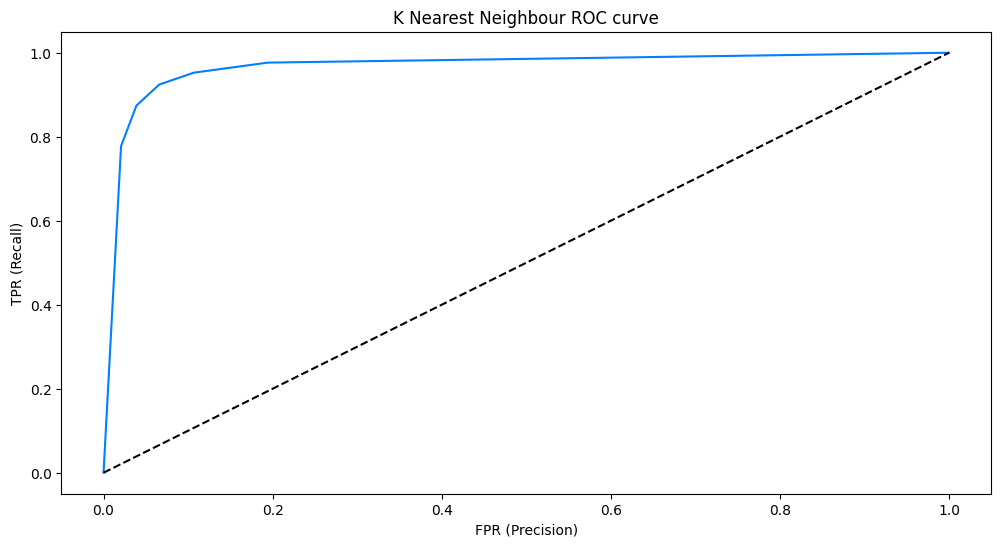

In [ ]:
#plot of roc_curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

plt.title('K Nearest Neighbour ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

###<b/>Evaluation Metrics of KNN Classifier</b>


In [ ]:
#append values in dataframe
evaluation_metrics_df=evaluation_metric('K Nearest Neighbour Classifier', y_test, y_pred, evaluation_metrics_df)
evaluation_metrics_df

,Model,Accuracy,Recall,Precision,f1-score,roc_auc_score,Train score,Test score
0,Logistic Regression,0.932402,0.939595,0.920945,0.930176,0.979634,0.938985,0.932402
1,Random Forest Classifier,0.930394,0.927374,0.927374,0.927374,0.976067,0.938985,0.932402
2,Random Forest with GridSearchCV,0.934493,0.929993,0.933088,0.931538,0.982079,0.938985,0.932402
3,XG Boost Classifier,0.932402,0.932437,0.926935,0.929678,0.981202,0.938985,0.932402
4,K Nearest Neighbour Classifier,0.929390,0.924232,0.928121,0.926172,0.966323,0.938985,0.932402


###<b/>Confusion matrix of KNN Classifier</b>

[[5815  410]
 [ 434 5294]]


Text(0.5, 1.0, 'KNN Classifier')

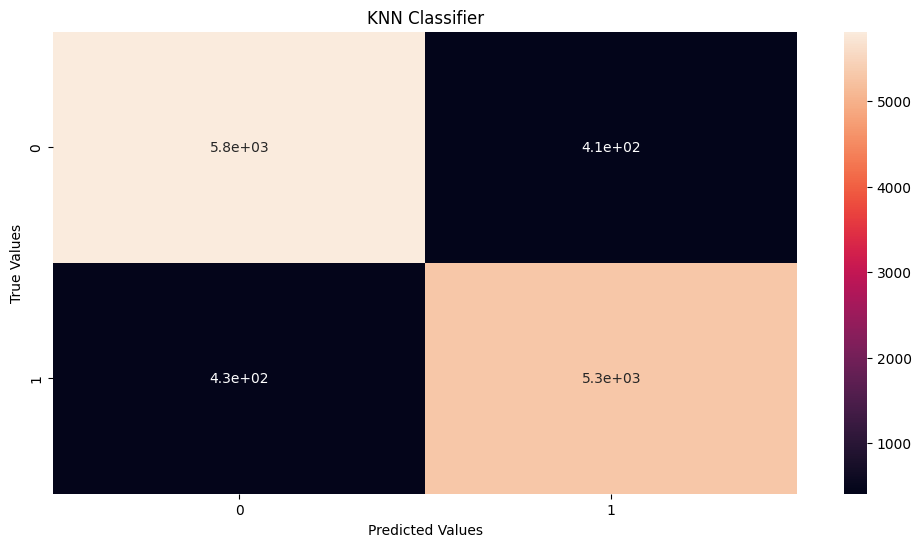

In [ ]:
# Get the confusion matrix for both train and test
cm = confusion_matrix(y_test, y_pred)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted Values')
ax.set_ylabel('True Values')
ax.set_title('KNN Classifier')

###<b/>Hyperparameter Tuning of KNN Classifier</b>

In [ ]:
#parameters
param_grid = {'n_neighbors':np.arange(10,50,2)}

In [ ]:
#fitting values
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42,
       44, 46, 48])})

In [ ]:
knn_cv.best_params_

{'n_neighbors': 42}

In [ ]:
#getting best estimator
knn_cv.best_estimator_

KNeighborsClassifier(n_neighbors=42)

In [ ]:
#assigining grid variable
knn_grid_best = knn_cv.best_estimator_

In [ ]:
#prediction
y_pred = knn_grid_best.predict(x_test)

In [ ]:
#evaluation metrics
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      6225
           1       0.93      0.93      0.93      5728

    accuracy                           0.93     11953
   macro avg       0.93      0.93      0.93     11953
weighted avg       0.93      0.93      0.93     11953



###<b/>ROC Curve of KNN Classifier after Hyperparameter Tuning</b>

In [ ]:
#roc_auc_score
y_pred_proba =knn_grid_best.predict_proba(x_test)[::,1]

auc_score=roc_auc_score(y_test,y_pred_proba)
auc_score

0.979952449462655

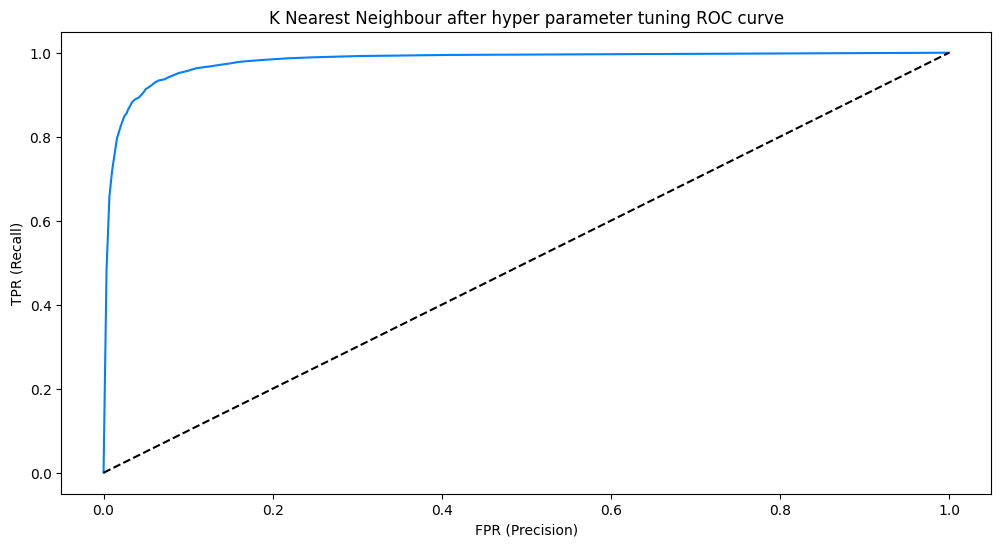

In [ ]:
#Plot roc_curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

plt.title('K Nearest Neighbour after hyper parameter tuning ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

###<b/>Evaluation Metrics of KNN Classifier after Hyperparameter Tuning</b>

In [ ]:
#append values in dataframe
evaluation_metrics_df=evaluation_metric('K Nearest Neighbour with GridSearchCV', y_test, y_pred, evaluation_metrics_df)
evaluation_metrics_df

,Model,Accuracy,Recall,Precision,f1-score,roc_auc_score,Train score,Test score
0,Logistic Regression,0.932402,0.939595,0.920945,0.930176,0.979634,0.938985,0.932402
1,Random Forest Classifier,0.930394,0.927374,0.927374,0.927374,0.976067,0.938985,0.932402
2,Random Forest with GridSearchCV,0.934493,0.929993,0.933088,0.931538,0.982079,0.938985,0.932402
3,XG Boost Classifier,0.932402,0.932437,0.926935,0.929678,0.981202,0.938985,0.932402
4,K Nearest Neighbour Classifier,0.929390,0.924232,0.928121,0.926172,0.966323,0.938985,0.932402
5,K Nearest Neighbour with GridSearchCV,0.934326,0.934008,0.929303,0.931650,0.979952,0.938985,0.932402


###<b/>Confusion matrix of KNN Classifier after Hyperprameter Tuning</b>


[[5818  407]
 [ 378 5350]]


Text(0.5, 1.0, 'KNN Classifier after hyperparmeter tuning')

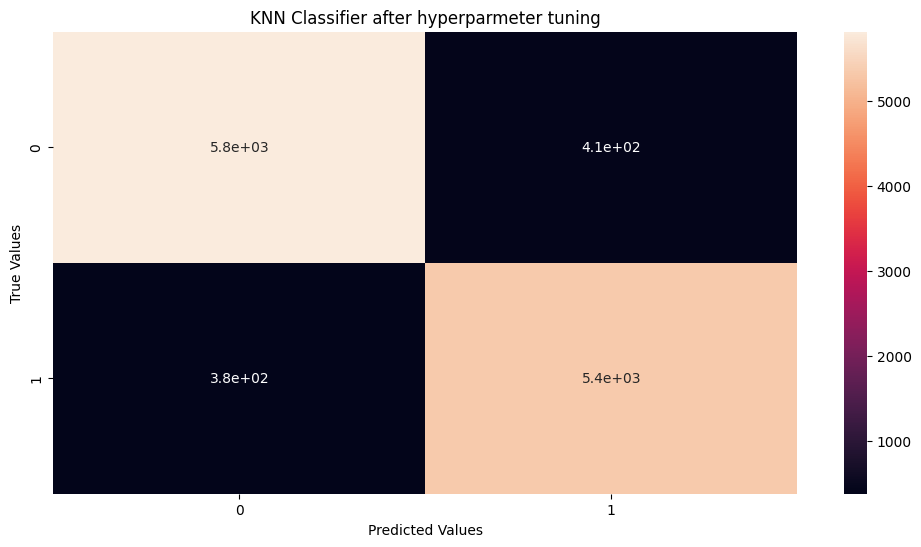

In [ ]:
# Get the confusion matrix for both train and test
cm = confusion_matrix(y_test, y_pred)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted Values')
ax.set_ylabel('True Values')
ax.set_title('KNN Classifier after hyperparmeter tuning')

In [ ]:
evaluation_metrics_df

,Model,Accuracy,Recall,Precision,f1-score,roc_auc_score,Train score,Test score
0,Logistic Regression,0.932402,0.939595,0.920945,0.930176,0.979634,0.938985,0.932402
1,Random Forest Classifier,0.930394,0.927374,0.927374,0.927374,0.976067,0.938985,0.932402
2,Random Forest with GridSearchCV,0.934493,0.929993,0.933088,0.931538,0.982079,0.938985,0.932402
3,XG Boost Classifier,0.932402,0.932437,0.926935,0.929678,0.981202,0.938985,0.932402
4,K Nearest Neighbour Classifier,0.929390,0.924232,0.928121,0.926172,0.966323,0.938985,0.932402
5,K Nearest Neighbour with GridSearchCV,0.934326,0.934008,0.929303,0.931650,0.979952,0.938985,0.932402


In [ ]:
#sort according to higher accuracy
evaluation_metrics_df.sort_values('Accuracy',ascending=False)

,Model,Accuracy,Recall,Precision,f1-score,roc_auc_score,Train score,Test score
2,Random Forest with GridSearchCV,0.934493,0.929993,0.933088,0.931538,0.982079,0.938985,0.932402
5,K Nearest Neighbour with GridSearchCV,0.934326,0.934008,0.929303,0.931650,0.979952,0.938985,0.932402
0,Logistic Regression,0.932402,0.939595,0.920945,0.930176,0.979634,0.938985,0.932402
3,XG Boost Classifier,0.932402,0.932437,0.926935,0.929678,0.981202,0.938985,0.932402
1,Random Forest Classifier,0.930394,0.927374,0.927374,0.927374,0.976067,0.938985,0.932402
4,K Nearest Neighbour Classifier,0.929390,0.924232,0.928121,0.926172,0.966323,0.938985,0.932402


#<b/>Conclusion</b>

-  We used four different classification models for this problem : 1) Logistic Regression, 2) Random Forest, 3) XG Boost Classifier, 4) K Nearest Neighbour Classifier

- The classification metrics sorted in the following order : Precison, Recall, Roc_Auc

- Best Roc-Auc score is given by Random Forest with GridSearchCV.

- From all the model we get accuracy more than 90%, that indicates all are effective at predicting outcome.

- HyperParameter tuning was performed using GridSearchCV to aviod overfitting and increase accuaracy for Random Forest, K Nearest Neighbour.


- The most important features that assist in model prediction are overall rating, value for money.


##<b/>Conclusion from EDA</b>


- In Traveller Type Solo Leisure get highest ratings.

- The ratings given by passenger for food_bev and entertainment in Economy class is lower than other class cabin.


- Amid, all aircraft A320 has done highest number of trip.


-  77% of passenger choose economy class and 3% of passenger choose the first class because economy class has lesser fair as compared to first class.


- The developed classfication models can be used to predict passenger refferals and help airlines identify impactful passengers who can being more revenue.

- For increment in bussiness, airlines should focus on providing the better cabin service, ground service, food and beverage.




